In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

# 4 Supervised Learning
This section presents several supervised learning algorithms in the following way:
- Application: When should this algorithm be used?
- Description: What does this algorithm do (high-level)?
- Functionality: How does this algorithm work (drill-down)?
- Limitations: What does one have to keep in mind when using this algorithm?
- Example: How is this algorithm applied?

## 4.1 Linear Regression
- Application: Linear Regression is used to quanify the strength of the linear relationship between a target and explanatory variables and based on this relationship predict the target variable
- Description: Linear Regression is a linear approach to model the relationship between a scalar target variable and one or more explanatory variables applying i.e. least squares minimization
- Functionality:
    * We can think of a Linear Regression as an orthogonal projection of the target variable $(\vec{y})$ onto the $span($$\vec{1}$, $\vec{x}$$)$
    * The equation for a Linear Regression is: $y$ = $\beta_{\,0}$ + $\beta_{\,1}$$x_{\,1}$ + ... + $\beta_{\,n}$$x_{\,n}$ + $\epsilon$
    * Our goal is to minimize the following adjusted form of the above equation (least squares minimization): $||$ $\vec{y}$ - ($\vec{\beta}_{\,0}$*$\vec{1}$ + $\vec{\beta}_{\,1}$*$\vec{x}_{\,1}$ + ... + $\vec{\beta}_{\,n}$$\vec{x}_{\,n}$) $||^{\,2}$; representing the minimization of the sum of squared residuals
    * In order to minimize this equation, we optimize $\vec{\beta}$ to find a linear combination of $\vec{1}$ and $\vec{x}$ that is as close to our target variable $\vec{y}$ as possible
    * We achieve this by projecting $\vec{y}$ onto the $span($$\vec{1}$, $\vec{x}$$)$, representing our predicted values
    * The residuals of the model are the differences between the actual values and the predicted values
    * $\vec{\beta}$ are unbiased parameters, meaning that if we were to sample a huge number of data points we would estimate the parameters of the true regression line
    * To determine whether there is a relationship between $y$ and $x$, we test the H0 that the parameters are equal to $0$ (one predictor: reject for p-value < 0.05, multiple predictors: reject for F-statistic > 1)
    * Interaction effect: Changing the value of one predictor effects the values of the other predictors; if this is the case, we have to include an interaction term in the model
    * Polynomial regression: Transform the predictors i.e. with polynomials to better achieve a better accuracy
    * Key assumptions: Linearity between $y$ and $x$, uncorrelated error terms, no pattern in residuals (normal distribution), homoscedasticity (constant variance of residuals), no (multi-)collinearity (independence of predictors, can be detected with Variance Inflation Factor)
- Limitations: It is very sensitive to outliers
- Note: If $y$ is not normally distributed, we need to fit Generalized Linear Models (i.e. $y$ ~ $Binom$, $y$ ~ $Pois$, $y$ ~ $Gamma$), which are estimated with the Maximum Likelihood function and have different links connecting the linear predictor and the expectation of the output (i.e. logit, probit, complementary log-log)

In [138]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [139]:
# load data
boston = load_boston()
features = pd.DataFrame(boston["data"], columns = boston["feature_names"])
y = boston["target"]
y = y[:505]
y_holdout = y[504:]
x = features[["RAD", "ZN", "CRIM", "AGE"]].values
x = x[:505]
x_holdout = x[504:]

# fit regression model
reg = LinearRegression().fit(x, y)

# predict
prediction = reg.predict(x_holdout) 

# print results
print("The betas for the model are: {}".format(np.around(reg.coef_, decimals = 2)))
print("The interception for the model is: {}".format(np.around(reg.intercept_, decimals = 2)))
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(prediction[0], y_holdout[0]))

The betas for the model are: [-0.13  0.08 -0.25 -0.04]
The interception for the model is: 26.49
Prediction: 22.75 vs. Actual: 22.00


## 4.2 Ridge and Lasso Regression
- Application: Ridge and Lasso Regression are applied to fit a linear regression given a large number of predictors with questionable effect on the model's accuracy (feature selection), especially if $p > n$, where $n$ - number of observations, $p$ - number of predictors; they can also be used to balance the parameters of the model
- Description: Ridge and Lasso Regression are techniques that regularize the coefficients of the regression, or respectively shrink them to zero if necessary in order to reduce varaince of the model by penalizeing cost functions by introducing more bias
- Functionality:
    * Ridge:
        * Ridge coefficients minimize: $\sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p}\beta_jx_{ij})^2 + \lambda \sum_{j=1}^{p}\beta_j^2$
        * The tuning parameter $\lambda$ shrinks every dimension of the data by the same proportion
        * The final model will still have all predictors, but the effect of predictors with small coefficients will be reduced
        * As the tuning parameter $\lambda$ increases, the flexibility of the model fit decreases, leading to reduced variance and higher bias
        * Ridge regression works best if the linear regression has high variance and if there is multicollinearity
    * Lasso:
        * Lasso coefficients minimize: $\sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p}\beta_jx_{ij})^2 + \lambda \sum_{j=1}^{p}|\beta_j|$
        * The tuning parameter $\lambda$ shrinks all coefficients toward zero by the same amount 
        * The adjusted form of the shrinkage penalty has the effect of forcing some of the coefficients to be exactly equal to exactly zero when the tuning parameter $\lambda$ is sufficiently large; this is because of the quadratic shape of the lasso equation compared to the circular shape of the ridge regression for the error contour
        * Hence, Lasso actually performs feature selection
    * Since the shrinkage penelty does not only impact the $\beta$ but also the value predictor, all predictors should be standardized before fitting a Ridge or Lasso regression
    * The best value for $\lambda$ is found with cross validation
    * Lasso and Ridge are generally less flexible than linear regression
- Limitations: Lasso produces simpler results and more interpretable models that only involve a subset of the predictors than Ridge

#### Ridge

In [103]:
from sklearn.datasets import load_boston
from sklearn import linear_model

In [141]:
boston = load_boston()
features = pd.DataFrame(boston["data"], columns = boston["feature_names"])
y = boston["target"]
y = y[:505]
y_holdout = y[504:]
x = features.values
x = x[:505]
x_holdout = x[504:]

# initialize and fit model
ridge = linear_model.Ridge(alpha=0.2).fit(x, y)

# predict
prediction = ridge.predict(x_holdout) 

# print results
print("The betas for the model are: {}".format(np.around(ridge.coef_, decimals = 2)))
print("The interception for the model is: {}".format(np.around(ridge.intercept_, decimals = 2)))
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(prediction[0], y_holdout[0]))

The betas for the model are: [-1.100e-01  5.000e-02  1.000e-02  2.630e+00 -1.545e+01  3.790e+00
 -0.000e+00 -1.460e+00  3.000e-01 -1.000e-02 -9.000e-01  1.000e-02
 -5.300e-01]
The interception for the model is: 34.81
Prediction: 26.43 vs. Actual: 22.00


#### Lasso

In [107]:
from sklearn.datasets import load_boston
from sklearn import linear_model

In [137]:
boston = load_boston()
features = pd.DataFrame(boston["data"], columns = boston["feature_names"])
y = boston["target"]
y = y[:505]
y_holdout = y[504:]
x = features.values
x = x[:505]
x_holdout = x[504:]

# initialize and fit model
lasso = linear_model.Lasso(alpha=0.2).fit(x, y)

# predict
prediction = lasso.predict(x_holdout) 

# print results
print("The betas for the model are: {}".format(np.around(lasso.coef_, decimals = 2)))
print("The interception for the model is: {}".format(np.around(lasso.intercept_, decimals = 2)))
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(prediction[0], y_holdout[0]))

The betas for the model are: [-0.09  0.05 -0.02  0.   -0.    3.37 -0.   -1.13  0.28 -0.02 -0.75  0.01
 -0.6 ]
The interception for the model is: 27.46
Prediction: 27.39 vs. Actual: 22.00


## 4.3 Logistic Regression
- Application: Logistic Regression is used to model the probabilities for a binary target variable/event/class
- Description: Logistic Regression is a non-linear classification model that is expressed as a linear model. It models probabilities for a binary target variable based on many more explanatory variables from different domains (categorical and/or continuous variable)
- Functionality:
    * If we'd use a linear regression to model this relationship it would look like this: $p(x) = \beta_0 + \beta_1x_1$; the problem with this equation is that the predicted probabilities don't fall between 0 and 1
    * In order to avoid this problem, we can apply different transformations such as the logistic function: $p(x) = {\frac{exp(\beta_0 + \beta_1x_1)}{1 + exp(\beta_0 + \beta_1x_1)}}$
    * After manipulating this new function we find that: $(\frac{p}{1-p}) = exp(\beta_0 + \beta_1x_1)$
    * $(\frac{p}{1-p})$ is called the odds of the odds of the event $Y=1$ to happen
    * If we want to bound this value between 0 and 1, we can again apply different transformations such as the logistic function: $ln(\frac{p}{1-p}) = \beta_0 + \beta_1x_1$
    * This is called $log$ $odds$ or $logit$ and shows that the logistic regression has a logit that is linear in $x$: We consider a linear model with a target and multiple explanatory variables and assume a linear relationship between the explanatory variables and the $log(odds)$ of the event $Y=1$: 
    * In order to transform the  $log$ $odds$ to the function for the probabilities, we have to apply the Sigmoid Function (inverse of the logit function)
    * Increaseing $x$ by one unit changes the $log$ $odds$ by $\beta_1$, or equivalently it multiplies the $odds$ by $exp(\beta_1)$
    * Logistic Regression fits a linear decision boundary; regression coefficients are estimated using the Maximum Likelihood Method
- Limitations: Logistic Regression can only predict a categorical outcome and cannot solve non-linear problems because it's decision surface is linear

In [130]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [151]:
# load data
iris = load_iris()
iris = pd.concat([pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]), pd.DataFrame(iris['target'], columns = ['Species'])],
                axis = 1)

# make binary classification
iris["Classification"] = np.where(iris["Species"] == 0, 0, 1)

# create arrays
y = iris['Classification']
x = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values

# initialize model
reg = LogisticRegression()

# fit model
reg.fit(x, y)

# predict probabilities
proba = reg.predict_proba([[5.1,3.5,1.4,.2]])

# print results
print("The betas for the model are: {}".format(reg.coef_))
print("The interception for the model is: {}".format(reg.intercept_))
print("The probability for data point with feature values: 5.1, 3.5, 1.4, 0.2 to belong to category 0 is {:.2f}".format(proba[0][0]))

The betas for the model are: [[-0.41021713 -1.46416217  2.26003266  1.02103509]]
The interception for the model is: [-0.26421853]
The probability for data point with feature values: 5.1, 3.5, 1.4, 0.2 to belong to category 0 is 0.98


## 4.4 K-Nearest Neighbors
- Application: K-Nearest Neighbors (KNN) is used for classification or regression
- Description: KNN identifies the k nearest points in the data and estimates the target based on the labels of this set of k nearest points
- Functionality:
    * First, we have to define k, the number of neighbors we are looking for; this number is usually small and depends on the bias-variance-tradeoff (small k high low bias and high variance and vice versa)
    * There are different methods to calculate the distance to the k nearest neighbors (i.e. euclidean, manhattan), selecting the right method is important
    * For classification: The target is classified by a plurality vote of the k nearest neighbors. The class is determined by the most common class among the k nearest neighbors. If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor
    * For regression: The target is estimated simply by the average of the values of the k nearest neighbors
    * It is common to assign weights to the contributions of the neighbors in order for nearer neighbors to contribute more to the target than the more distant ones
- Limitations: KNN is a lazy learner, meaning that it does not learn from the training data but rather uses it for its prediction. This is referred to as memory-based approach, because  we need all training data at each time we want to make a prediction; this makes KNN rather slow, because it has to compute the distance to all points in the training set, sort them, and make a prediction; KNN is not robust to noisy data; KNN does not work well for high dimensionality data because of the curse of dimensionality (there are no points that are close)

#### Regression

In [232]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as MSE

In [247]:
# load data
boston = load_boston()
features = pd.DataFrame(boston["data"], columns = boston["feature_names"])
y = boston["target"]
y = y[:505]
y_holdout = y[504:]
x = features[["RAD", "ZN", "CRIM", "AGE"]].values
x = x[:505]
x_holdout = x[504:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize knn
knn = KNeighborsRegressor(n_neighbors = 10)

# fit knn
knn.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = knn.predict(x_test)

# make predictions on x_train
y_pred_train = knn.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# train rmse
train_rmse = MSE(y_train, y_pred_train)**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'Train set RMSE is {:.2f}'.format(train_rmse))

# predict
prediction = knn.predict(x_holdout)
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(float(prediction), float(y_holdout)))

Test set RMSE is 8.77; Train set RMSE is 7.13
Prediction: 23.18 vs. Actual: 22.00


#### Classification

In [229]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error as MSE

In [248]:
# load data
iris = load_iris()
iris = pd.concat([pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]), pd.DataFrame(iris['target'], columns = ['Species'])],
                axis = 1)
y = iris['Species']
y = y[:149]
y_holdout = y[148:]
x = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
x = x[:149]
x_holdout = x[148:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize knn
knn = KNeighborsClassifier(n_neighbors = 10)

# fit knn
knn.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = knn.predict(x_test)

# make predictions on x_train
y_pred_train = knn.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# train rmse
train_rmse = MSE(y_train, y_pred_train)**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'Train set RMSE is {:.2f}'.format(train_rmse))

# predict
prediction = knn.predict(x_holdout)
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(float(prediction), float(y_holdout)))

Test set RMSE is 0.18; Train set RMSE is 0.18
Prediction: 2.00 vs. Actual: 2.00


## 4.5 Apriori Algorithm
- Application: Apriori is used to find relationships/associations of items in data sets (i.e. market basked analysis)
- Description: Apriori determines item sets that appear sufficiently often together in the data. These item sets are used to define association rules which highlight general trends in the data
- Functionality:
    * The algorithm is based on the following three constructs: Support, Confidence, and Lift. When running the algorithm, we have to define minimum values for each of the three consturcts
    * Support: Represents the popularity of an item $Support(B) = \frac{trx_B}{trx_{all}}$
    * Confidence: Represents the likelihood that item $B$ is also purchased when item $A$ is purchased: $Confidence(A→B) = \frac{trx_{AB}}{trx_A} $
    * Lift: Represents the increase in the ratio of sale B when A is sold: $Lift(A→B) = \frac{Confidence(A→B)}{Support(B)} $
    * Marketing campagins are focused on the lift specifically. $Lift = 1$ menas there is no association between the products. $Lift > 1$ means that item A & B are more likely to be bought together.
    * This algorithm works solely based on the purchase history of items and we do not need any features to the items to run it
    * A strong pattern would be an item with low support, meaning it is not purchased very often, but high confidence, meaning that if its purchased it is purchased in combination with other itmes.
- Limitations: Apriori might be slow as it calculates all possible combinations between items, becomeing a problem if there is a large number of items

In [263]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [271]:
# create dataset
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]

# encode transactions
te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset).astype('int')
df = pd.DataFrame(te_array, columns = te.columns_)

# apply apriori
frequent_itemsets = apriori(df, min_support = 0.4, use_colnames = True)

# length of sets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets)

# find association rules
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
print(rules)

   support      itemsets  length
0    0.625       (Apple)       1
1    0.750        (Beer)       1
2    0.500        (Rice)       1
3    0.500  (Beer, Rice)       2
  antecedents consequents  antecedent support  consequent support  support  \
0      (Beer)      (Rice)                0.75                0.50      0.5   
1      (Rice)      (Beer)                0.50                0.75      0.5   

   confidence      lift  leverage  conviction  
0    0.666667  1.333333     0.125         1.5  
1    1.000000  1.333333     0.125         inf  


## 4.6 Support Vector Machines
- Application: Support Vector Machienes (SVM) are generally used for classification problems
- Description: SVMs fit a linear decision boundary that best divides a dataset into two or more classes. SVM can also solve non-linear classification problems, applying the Kernel Trick taht transforms data into higher dimensions in which a linear decision boundary can be fit
- Functionality:
    * Hyperplane: Linear decision boundary between two classes with $p-1$ dimensions; formula: $\beta_0 + \beta_1x_1 + ... + \beta_px_p = 0$
    * Margin: Minimal distance between the hyperplane and the nearest data point from either class
    * Support Vectors: Data points closest to the hyperplane; removing support vectors alters the position of the hyperplane whereas data points within classes don't
    * **Maximal margin classifier**:
        * Goal: Chose a hyperplane with the highest possible margin within the training set, giving a greater chance of new data being classified correctly
        * To do so we calculate the perpendicular distance form the training data to the hyperplane; this is only possible if the two classes are perfectly seperable
    * **Support vector classifier**: 
        * Goal: Misclassify a few training observations in order to do a better job in classifying the remaining observations
        * To do so we allow a soft margin, meaning that we introduce a budget $C$ for the amount that we can misclassify observations (are around the hyperplane in which data can be misclassified); if $C$ is small, there will be fewer support vectors and hence the classifier will have high variance but low bias
    * **Support vector machines** 
        * Goal: If the decision boundary is non-linear, we transform the data to enlarge the feature space using $kernels$ (an computationally efficient approach to enlarging the feature space)
        * As a result we map our input space into as many higher-dimensionality feature spaces as we need in which we can fit a linear decision boundary with support vector classifiers
        * Kernel SVMs find the function that best transform the input data into a new feature space in order to separate the classes and the output of that function becomes the new dimension (i.e. polynomial, radial)
        * Based on this fitted decision boundary, incoming data is mapped into that same space as the training data and predicted to belong to a category based on the side of the hyperplane on which they fall
- Limitations: Don't perform well on multi-class classification, need to transform into one-vs-many classification; less effective on noisier datasets with overlapping classes and high training times on large datasets

In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report

In [54]:
# load data
iris = load_iris()
iris = pd.concat([pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]), pd.DataFrame(iris['target'], columns = ['Species'])],
                axis = 1)
y = iris['Species']
y = y[:149]
y_holdout = y[148:]
x = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
x = x[:149]
x_holdout = x[148:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize and fit models with different kernels
C = 1
svc = svm.SVC(kernel = 'linear', C = C).fit(x_train, y_train)
rbf = svm.SVC(kernel = 'rbf', gamma = 0.7, C = C).fit(x_train, y_train)
poly_svc = svm.SVC(kernel = 'poly', degree = 3, C = C).fit(x_train, y_train)
lin_svc = svm.LinearSVC(C = C).fit(x_train, y_train)

# predict
y_pred_svc = svc.predict(x_test)
y_pred_rbf = rbf.predict(x_test)
y_pred_poly_svc = poly_svc.predict(x_test)
y_pred_lin_svc = lin_svc.predict(x_test)

# print classification reports
print('y_pred_svc:', classification_report(y_test, y_pred_svc, target_names = ['Setosa', 'Versicolor', 'Virginica']))
print('y_pred_rbf:', classification_report(y_test, y_pred_rbf, target_names = ['Setosa', 'Versicolor', 'Virginica']))
print('y_pred_poly_svc:', classification_report(y_test, y_pred_poly_svc, target_names = ['Setosa', 'Versicolor', 'Virginica']))
print('y_pred_lin_svc:', classification_report(y_test, y_pred_lin_svc, target_names = ['Setosa', 'Versicolor', 'Virginica']))

y_pred_svc:               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      1.00      1.00        11
   Virginica       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

y_pred_rbf:               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      0.91      0.95        11
   Virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

y_pred_poly_svc:               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      0.91      0.95        11
   Virginica       0.88      1.00 

## 4.7 Classification And Regression Trees
- Application: Classification And Regression Trees (CART) are used for classification and regression problems
- Description: Decision Trees learn decision rules from observations about items. To make conclusions about new items' target variable, we apply the decision rules to the values of new items, meaning that we follow the branches of the Decision Tree, compare values and jump to the next node until arriving at a conclusion
- Functionality:
    * Root node: Doesn't have a parent node, question gets divided into two child nodes
    * Internal node: Has a parent node, question gets divided into two child nodes
    * Lead node: Has a parent node, but no child nodes; represents the prediction
    * Depthness of a decision tree: Number of nodes of the tree
    * Classification: **information gain**
        * Constructing a classification decision tree is about splitting into child nodes in a way that increases the information gain
        * Entropy: Measure of randomness in an event (events with high randomness: hard to draw conclusions from; pure events: expect same outcome for every occurance of the event); formula: $E(S) = \sum_{i=1}^{N} - p_i log_2 p_i$
        * GINI: Measure of total variance across classes in a node; formula: $GINI = 1 - \sum_{i=1}^{N} p_i^2$
        * Information Gain: Decrease in entropy; forumla $IG = Entropy(before$ $split)$ $- Entropy($$after$ $split)$
        * Approach: 
            * Define decision rule based on the items' values that creates the best split of items based on the target variable
            * Calculate information gain for the split; if there is no increase in information gain we formulate another decision rule
            * Once a decision rule with sufficient information gain is defined, we split into two child notes     
            * If we the child nodes have pure events we don't need to split into more nodes; if not we split into more nodes to further increase purity
            * Splitting stops when no further information gain can be made or pre-set stopping rules are met
            * Each branch ends in a lead node, making each observation fall into exaclty one lead node and each lead node uniquely defined by a set of rules
            * The lead nodes' predictions are the mean or mode of all items falling into that leaf node
    * Regression: **recursive binary splitting**
        * Recursive binary splitting: Greedy approach because at each step of the tree-building process, the best split is made at that particular step ignoring a future split that will lead to an overall better tree
        * Approach:
            * Define decision rule based on the itmes' values that leads to the highest possible reduction in residual sum of squares (SSR) of the tree
            * Repeat this process, looking for the best predictor and the best cutpoints to futher minimize the SSR within each resulting node
            * Splitting stops when no further reduction in SSR is possible or pre-set stopping rules are met
            * Cost complexity pruning: Obtain a sequence of subtrees indexed at $\alpha$ (increases with the number of lead nodes), run cross validation on all subtrees and select subtree sith lowest $CV error$; this approach controls the trade-off between the complexity and its fit to the training data
- Limitations: Instability due to high variance in sampled data, high sensitivity to the data that its trained to

#### Regression

In [28]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [109]:
# load data
boston = load_boston()
features = pd.DataFrame(boston["data"], columns = boston["feature_names"])
y = boston["target"]
y = y[:505]
y_holdout = y[504:]
x = features[["RAD", "ZN", "CRIM", "AGE"]].values
x = x[:505]
x_holdout = x[504:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize decision tree
dt = DecisionTreeRegressor(max_depth = 2, min_samples_leaf = 5, random_state = 3)

# fit decision tree
dt.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = dt.predict(x_test)

# make predictions on x_train
y_pred_train = dt.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# mean cv (runs on train set)
mse_cv_scores = - cross_val_score(dt, x_train, y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)

# compute the 10-folds CV rmse
cv_rmse = (mse_cv_scores.mean())**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'the CV RMSE is {:.2f}'.format(cv_rmse))

# find feature importance
print(pd.Series(dt.feature_importances_, index = ["RAD", "ZN", "CRIM", "AGE"]).sort_values(ascending = False))

# predict
prediction = dt.predict(x_holdout)
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(float(prediction), float(y_holdout)))

Test set RMSE is 8.29; the CV RMSE is 7.90
CRIM    0.682594
ZN      0.317406
AGE     0.000000
RAD     0.000000
dtype: float64
Prediction: 22.36 vs. Actual: 22.00


#### Classification

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [66]:
# load data
iris = load_iris()
iris = pd.concat([pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]), pd.DataFrame(iris['target'], columns = ['Species'])],
                axis = 1)
y = iris['Species']
y = y[:149]
y_holdout = y[148:]
x = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
x = x[:149]
x_holdout = x[148:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize decision tree
dt = DecisionTreeClassifier(random_state = 3)

# fit decision tree
dt.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = dt.predict(x_test)

# make predictions on x_train
y_pred_train = dt.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# mean cv (runs on train set)
mse_cv_scores = - cross_val_score(dt, x_train, y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)

# compute the 10-folds CV rmse
cv_rmse = (mse_cv_scores.mean())**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'the CV RMSE is {:.2f}'.format(cv_rmse))

# find feature importance
print(pd.Series(dt.feature_importances_, index = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]).sort_values(ascending = False))

# predict
prediction = dt.predict(x_holdout)
print("Prediction: {} vs. Actual: {}".format(float(prediction), float(y_holdout)))

Test set RMSE is 0.18; the CV RMSE is 0.22
PetalWidthCm     0.884093
PetalLengthCm    0.089412
SepalWidthCm     0.018925
SepalLengthCm    0.007570
dtype: float64
Prediction: 2.0 vs. Actual: 2.0


## 4.8 Random Forest
- Application: Random Forests are used for classifiaction and regression problems
- Description: Random Forests are an ensemble learning method, training a multitude of decision trees on the same dataset and aggregating the predictions of the individual trees (i.e. mode of classes for classification, mean of predictions for regression)
- Functionality:
    * Esemble Learning: Fit a multitude of independent models on sampeled data from the same dataset and aggregate predictions by majority voting for classification and by averaging for regression
    * Base model: Large number of individual and uncorrelated decision trees; all models must be of the same kind
    * Bagging/Bootsrapping:
        * We take a random sample of observations from the dataset with replacement: If we have a training set with N observations, we still feed each tree a training set of size N, but instead of the original training data, we randomly select N observations with replacement from the training data in order to to produce a bootstrap data set
        * Rationale: This process allows us to emulate the process of obtaining new sample sets, so we can estimate the variablility without generating new samples in order to minimize the variance of the predictions
    * Feature bagging: 
        * When splitting into a node, each decision tree in a random forest can only pick from a random subset of features without replacement, forcing more variation amongst the trees in the model and ultimately resulting in lower correlation across trees and more diversification
        * Rationale: If one or a few features are very strong predictors for the target variable, these features will be selected in many decision trees; we decorrelate the trees
    * We repeat this process multiple times based on the same training data to build different models that are then aggregated repsectively; each individual model has high variance, but averaging the models reduced variance
- Limitations: Some features might get sampled often whereas others not so often; difficult to interpret 

#### Regression

In [111]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [128]:
# load data
boston = load_boston()
features = pd.DataFrame(boston["data"], columns = boston["feature_names"])
y = boston["target"]
y = y[:505]
y_holdout = y[504:]
x = features[["RAD", "ZN", "CRIM", "AGE"]].values
x = x[:505]
x_holdout = x[504:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize decision tree
rf = RandomForestRegressor(max_depth = 10, min_samples_leaf = 5, random_state = 3)

# fit decision tree
rf.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = rf.predict(x_test)

# make predictions on x_train
y_pred_train = rf.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# mean cv (runs on train set)
mse_cv_scores = - cross_val_score(dt, x_train, y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)

# compute the 10-folds CV rmse
cv_rmse = (mse_cv_scores.mean())**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'the CV RMSE is {:.2f}'.format(cv_rmse))

# find feature importance
print(pd.Series(rf.feature_importances_, index = ["RAD", "ZN", "CRIM", "AGE"]).sort_values(ascending = False))

# predict
prediction = rf.predict(x_holdout)
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(float(prediction), float(y_holdout)))

Test set RMSE is 7.86; the CV RMSE is 7.90
CRIM    0.479596
ZN      0.220512
AGE     0.216424
RAD     0.083469
dtype: float64
Prediction: 21.17 vs. Actual: 22.00


#### Classification

In [126]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [127]:
# load data
iris = load_iris()
iris = pd.concat([pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]), pd.DataFrame(iris['target'], columns = ['Species'])],
                axis = 1)
y = iris['Species']
y = y[:149]
y_holdout = y[148:]
x = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
x = x[:149]
x_holdout = x[148:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize decision tree
rf = RandomForestClassifier(max_depth = 1, min_samples_leaf = 10, random_state = 3)

# fit decision tree
rf.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = rf.predict(x_test)

# make predictions on x_train
y_pred_train = rf.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# mean cv (runs on train set)
mse_cv_scores = - cross_val_score(dt, x_train, y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)

# compute the 10-folds CV rmse
cv_rmse = (mse_cv_scores.mean())**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'the CV RMSE is {:.2f}'.format(cv_rmse))

# find feature importance
print(pd.Series(rf.feature_importances_, index = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]).sort_values(ascending = False))

# predict
prediction = rf.predict(x_holdout)
print("Prediction: {} vs. Actual: {}".format(float(prediction), float(y_holdout)))

Test set RMSE is 0.26; the CV RMSE is 0.25
PetalWidthCm     0.5
SepalLengthCm    0.3
PetalLengthCm    0.2
SepalWidthCm     0.0
dtype: float64
Prediction: 2.0 vs. Actual: 2.0


## 4.9 Gradient Boosting
- Application: Gradient Boosting is used for classification and regression problems
- Description: Gradient Boosting is an ensemble learning method, building a multitude of decision trees sequentially with each model learning from the errors of its predecessors
- Functionality:
    * Boosting does not involve bootstrapping; instead each tree is fit on a modified version of the original data
    * We start by fitting a simple model (i.e. decision tree)
    * We then fit a new decision tree to the residuals of the model (we fit the tree using the residuals as the response)
    * We then add this decision tree into the fitted function in order to update the residuals
    * This way, we slowly improve the overall model in areas that it doesn't perform well yet
- Limitations: Prone to overfitting, requires careful tuning of hyperparameters

#### Regression

In [115]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [116]:
# load data
boston = load_boston()
features = pd.DataFrame(boston["data"], columns = boston["feature_names"])
y = boston["target"]
y = y[:505]
y_holdout = y[504:]
x = features[["RAD", "ZN", "CRIM", "AGE"]].values
x = x[:505]
x_holdout = x[504:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize decision tree
gb = GradientBoostingRegressor(max_depth = 3, min_samples_leaf = 10, random_state = 3)

# fit decision tree
gb.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = gb.predict(x_test)

# make predictions on x_train
y_pred_train = gb.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# mean cv (runs on train set)
mse_cv_scores = - cross_val_score(dt, x_train, y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)

# compute the 10-folds CV rmse
cv_rmse = (mse_cv_scores.mean())**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'the CV RMSE is {:.2f}'.format(cv_rmse))

# find feature importance
print(pd.Series(gb.feature_importances_, index = ["RAD", "ZN", "CRIM", "AGE"]).sort_values(ascending = False))

# predict
prediction = gb.predict(x_holdout)
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(float(prediction), float(y_holdout)))

Test set RMSE is 8.14; the CV RMSE is 7.90
CRIM    0.552882
ZN      0.203198
AGE     0.156695
RAD     0.087225
dtype: float64
Prediction: 21.12 vs. Actual: 22.00


#### Classification

In [82]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [117]:
# load data
iris = load_iris()
iris = pd.concat([pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]), pd.DataFrame(iris['target'], columns = ['Species'])],
                axis = 1)
y = iris['Species']
y = y[:149]
y_holdout = y[148:]
x = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
x = x[:149]
x_holdout = x[148:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize decision tree
gb = GradientBoostingClassifier(max_depth = 2, min_samples_leaf = 10, random_state = 3)

# fit decision tree
gb.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = gb.predict(x_test)

# make predictions on x_train
y_pred_train = gb.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# mean cv (runs on train set)
mse_cv_scores = - cross_val_score(dt, x_train, y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)

# compute the 10-folds CV rmse
cv_rmse = (mse_cv_scores.mean())**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'the CV RMSE is {:.2f}'.format(cv_rmse))

# find feature importance
print(pd.Series(gb.feature_importances_, index = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]).sort_values(ascending = False))

# predict
prediction = gb.predict(x_holdout)
print("Prediction: {} vs. Actual: {}".format(float(prediction), float(y_holdout)))

Test set RMSE is 0.18; the CV RMSE is 0.25
PetalWidthCm     0.576158
PetalLengthCm    0.415946
SepalWidthCm     0.006801
SepalLengthCm    0.001095
dtype: float64
Prediction: 2.0 vs. Actual: 2.0


## 4.10 Graph Networks
- Application: Graph Networks are used to analyze and visualize several real world datasets such as social networks, web link data, molecular structures, geographical maps, images and text.
- Description: Graph Networks analyze the relationships and dependencies among a set of items.
- Functionality:
    * A graph consists of nodes (items) and edges (relationships)
    * Types: Undirected networks (edges have no direction, directed networks (edges have direction), weighted networks (edges have an assigned weight), multi-graphs (nodes with multiple edges), signed networks (edges with positive or negative sign) 
    * Path finding:
        * Breath First Search algorithm: Finds the minimum number of edges (shortes path) between two nodes
        * Depth First Search algorithm: Visits all of the edges in a network while avoiding circles
    * Centrality:
        * Degree centrality: (# of node neighbors) / (# of potential node neighbors)
        * Betweenness centrality: # of times a node is present in the shortest path of two nodes: (# shortest path through a node) / (all possible shortest paths)
        * Eigenvector centrality: if its connected to other important nodes (i.e. Google page rank)
- Limitations: Entire graph needs to be processed simultaneously, which can be impractical for large graphs

In [35]:
import networkx as nx

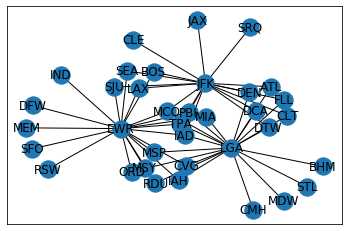

Nodes: ['EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE']
Edges: [('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU

In [46]:
# load data
airlines = pd.read_csv('datasets/Airlines.csv', index_col = 0)

# initialize graph network
FG = nx.from_pandas_edgelist(airlines, source = 'origin', target = 'dest', edge_attr = True)

# draw the network
nx.draw_networkx(FG)
plt.show()

# print nodes and edges
print('Nodes:', FG.nodes())
print('Edges:', FG.edges())

# calculate average degree centrality
print('Average Degree Centrality:', np.mean(np.asarray(list(nx.algorithms.degree_centrality(FG).values()))))